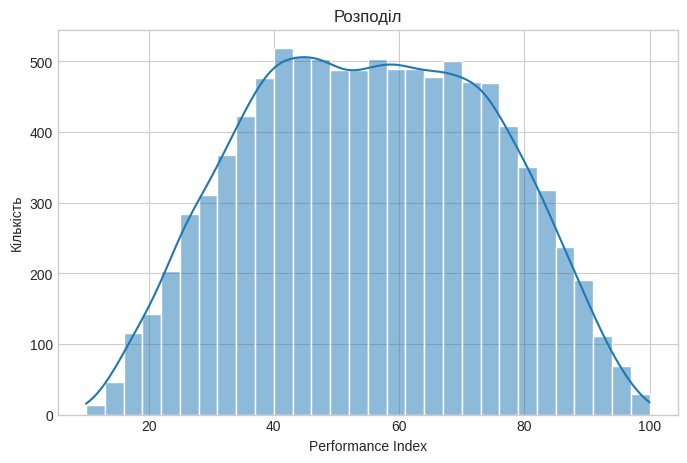

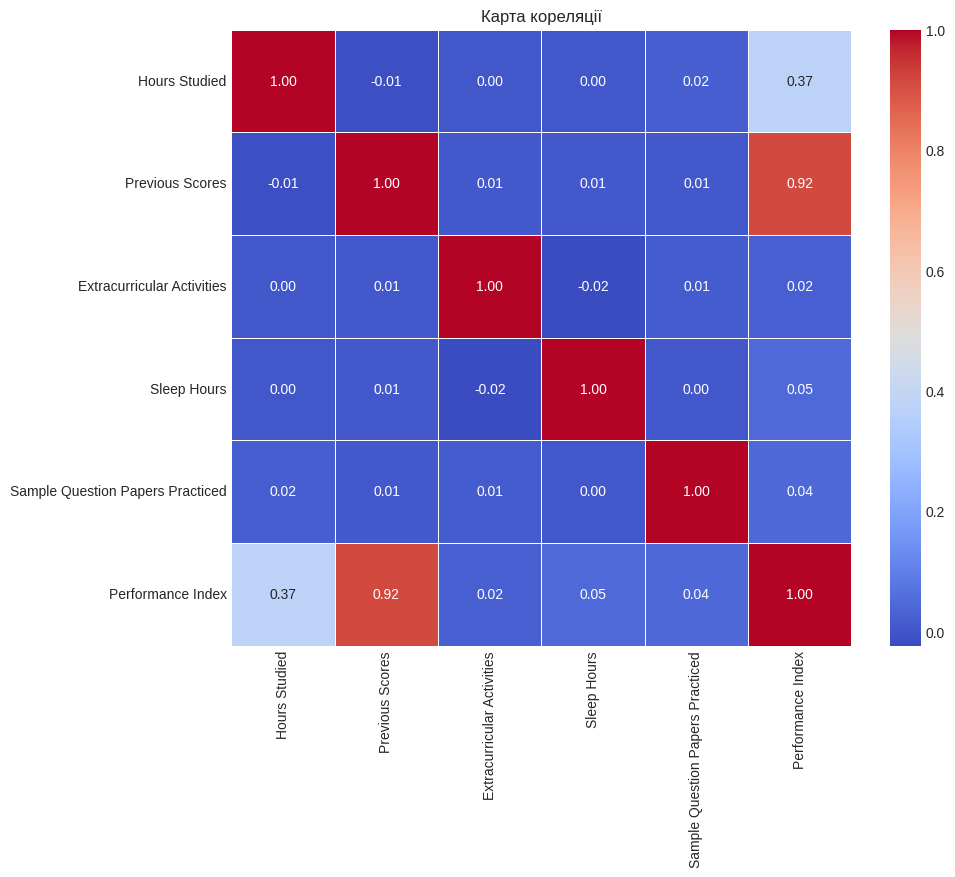

R2: 0.9890
MSE: 4.0826
Коефіцієнти моделі, відсортовані за важливістю:
                            Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
2        Extracurricular Activities     0.608617
3                       Sleep Hours     0.476941
4  Sample Question Papers Practiced     0.191831


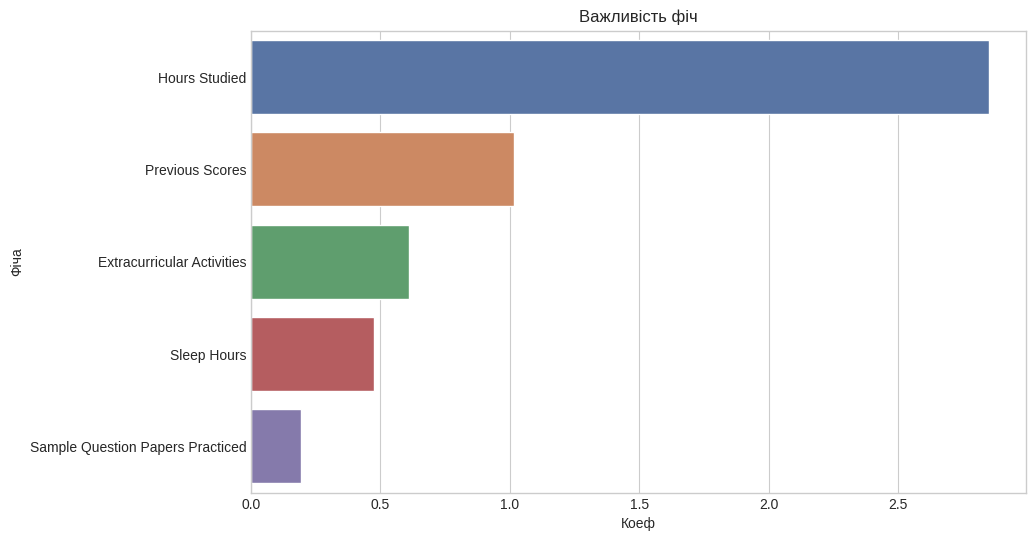

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

data_set = pd.read_csv("Student_Performance.csv")

# EDA
plt.figure(figsize=(8, 5))
sns.histplot(data_set["Performance Index"], kde=True, bins=30)
plt.title("Розподіл")
plt.xlabel("Performance Index")
plt.ylabel("Кількість")
plt.show()

data_set_corr = data_set.copy()
label_encoder_eda = LabelEncoder()
data_set_corr["Extracurricular Activities"] = label_encoder_eda.fit_transform(data_set_corr["Extracurricular Activities"])

plt.figure(figsize=(10, 8))
correlation_matrix = data_set_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Карта кореляції")
plt.show()

# регресія
X = data_set.drop("Performance Index", axis=1)
y = data_set["Performance Index"]

label_encoder_model = LabelEncoder()
X["Extracurricular Activities"] = label_encoder_model.fit_transform(X["Extracurricular Activities"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.4f}")

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": regressor.coef_
})
coefficients["Abs_Coefficient"] = np.abs(coefficients["Coefficient"])
coefficients = coefficients.sort_values(by="Abs_Coefficient", ascending=False)
print("Коефіцієнти моделі, відсортовані за важливістю:")
print(coefficients[["Feature", "Coefficient"]])

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients, hue="Feature", palette="deep", legend=False)
plt.title("Важливість фіч")
plt.xlabel("Коеф")
plt.ylabel("Фіча")
plt.show()